朴素贝叶斯是一个不建模的算法

以往我们学习的算法，比如KMeans，PCA，都是无监督学习，而朴素贝叶斯是第一个有监督的，不建模的算法

现在，我们就将求解连续型变量下某个点取值的概率问题，转化成了求解一个函数在点上的取值的问题。那接   
下来只要找到我们的 ，我们就可以求解出不同的条件概率了

在现实中，往往假设F（x）是满足某种统计学的分布的，有高斯分布、伯努利分布、多项式分布等，本质相同，计算之中的F（x）不同。fit   
过程是在估计对应分布的参数，predict过程是在给参数下分布中去进行概率预测。

naive_bayes.BernoulliNB   
naive_bayes.GaussianNB   
naive_bayes.MultinomialNB   
naive_bayes.ComplementNB   
naive_bayes.BayesianRidge

一、高斯朴素贝叶斯（每个特征每个类别下假设是服从高斯分布的）

参数：   
prior---先验P(Y)   
var_smoothing---默认1e-9,为了追求估计的稳定性，将所有特征的方差中最大的方差以某个比例添加到估计的方差中。

In [1]:
%%cmd
pip install watermark

Microsoft Windows [版本 10.0.18363.1082]
(c) 2019 Microsoft Corporation。保留所有权利。

D:\anaconda_running>pip install watermark

D:\anaconda_running>

In [ ]:
#在这里必须分开cell，魔法命令必须是一个cell的第一部分内容
#注意load_ext这个命令只能够执行一次，再执行就会报错，要求用reload命令

In [2]:
%load_ext watermark

In [3]:
%watermark -a "TsaiTsai" -d -v -m -p numpy,pandas,matplotlib,scipy,sklearn

TsaiTsai 2020-10-20 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
scipy 1.2.1
sklearn 0.20.3

compiler   : MSC v.1915 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 61 Stepping 4, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [11]:
digits = load_digits()
X, y = digits.data, digits.target

In [12]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [13]:
Xtrain.shape

(1257, 64)

In [14]:
Xtest.shape

(540, 64)

In [9]:
np.unique(Ytrain)   # 多分类问题，类别是10个

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
gnb = GaussianNB().fit(Xtrain,Ytrain)

In [18]:
#查看分数
acc_score = gnb.score(Xtest,Ytest)   # 返回预测的精确性

acc_score

0.8592592592592593

In [19]:
#查看预测结果
Y_pred = gnb.predict(Xtest) 

In [23]:
Y_pred

array([6, 1, 3, 0, 4, 5, 0, 8, 3, 8, 6, 8, 7, 8, 8, 8, 5, 9, 5, 6, 5, 4,
       7, 4, 8, 2, 7, 2, 8, 9, 2, 8, 3, 6, 0, 3, 8, 8, 1, 5, 2, 8, 8, 9,
       2, 2, 0, 7, 3, 6, 7, 2, 8, 0, 5, 4, 1, 9, 4, 0, 5, 8, 9, 1, 7, 8,
       7, 5, 8, 2, 4, 4, 8, 2, 6, 1, 2, 1, 7, 8, 8, 5, 9, 4, 3, 6, 9, 7,
       4, 2, 4, 8, 0, 5, 7, 7, 7, 4, 7, 8, 8, 7, 0, 7, 2, 1, 9, 9, 8, 7,
       1, 5, 1, 8, 0, 4, 8, 9, 5, 6, 4, 8, 3, 8, 0, 6, 8, 6, 7, 6, 1, 8,
       5, 0, 8, 2, 1, 8, 8, 6, 6, 0, 2, 4, 7, 8, 9, 5, 9, 4, 7, 8, 8, 6,
       7, 0, 8, 4, 7, 2, 2, 6, 4, 4, 1, 0, 3, 4, 3, 8, 7, 0, 6, 9, 7, 5,
       5, 3, 6, 1, 6, 6, 2, 3, 8, 2, 7, 3, 1, 1, 6, 8, 8, 8, 7, 7, 2, 5,
       0, 0, 8, 6, 6, 7, 6, 0, 7, 5, 5, 8, 4, 6, 5, 1, 5, 1, 9, 6, 8, 8,
       8, 2, 4, 8, 6, 5, 9, 9, 3, 1, 9, 1, 3, 3, 5, 5, 7, 7, 4, 0, 9, 0,
       9, 9, 6, 4, 3, 4, 8, 1, 0, 2, 9, 7, 6, 8, 8, 0, 6, 0, 1, 7, 1, 9,
       5, 4, 6, 8, 1, 5, 7, 7, 5, 1, 0, 0, 9, 3, 9, 1, 6, 3, 7, 2, 7, 1,
       9, 9, 8, 3, 3, 5, 7, 7, 7, 3, 9, 5, 0, 7, 5,

In [24]:
#查看预测的概率结果
prob = gnb.predict_proba(Xtest)

prob.shape  #每一列对应一个标签下的概率

(540, 10)

In [15]:
prob[1,:].sum() #每一行的和都是一

1.000000000000003

In [16]:
prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [17]:
from sklearn.metrics import confusion_matrix as CM

In [18]:
CM(Ytest,Y_pred) 
#注意，ROC曲线是不能用于多分类的。多分类状况下最佳的模型评估指标是混淆矩阵和整体的准确度

array([[47,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0, 46,  2,  0,  0,  0,  0,  3,  6,  2],
       [ 0,  2, 35,  0,  0,  0,  1,  0, 16,  0],
       [ 0,  0,  1, 40,  0,  1,  0,  3,  4,  0],
       [ 0,  0,  1,  0, 39,  0,  1,  4,  0,  0],
       [ 0,  0,  0,  2,  0, 58,  1,  1,  1,  0],
       [ 0,  0,  1,  0,  0,  1, 49,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  2, 55,  0],
       [ 1,  1,  0,  1,  2,  0,  0,  3,  7, 41]], dtype=int64)

探索高斯朴素贝叶斯擅长的数据集

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.naive_bayes import GaussianNB

h = .02
names = ["Multinomial","Gaussian","Bernoulli","Complement"]
classifiers = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2) 
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
           ]
figure = plt.figure(figsize=(6, 9))

i = 1
for ds_index, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),np.arange(x2_min, x2_max, 0.2))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), 2, i)
    if ds_index == 0:
        ax.set_title("Input data")
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
               cmap=cm_bright,edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
               cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    ax = plt.subplot(len(datasets),2,i)
    clf = GaussianNB().fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                edgecolors='k', alpha=0.6)

    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_index == 0:
        ax.set_title("Gaussian Bayes")
   
   ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
            size=15, horizontalalignment='right')
    i += 1
plt.tight_layout()
plt.show()

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 27)

探索贝叶斯：高斯朴素贝叶斯的拟合效果与运算速度

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.linear_model import LogisticRegression as LR

from sklearn.datasets import load_digits

from sklearn.model_selection import learning_curve  # 画学习曲线的类

from sklearn.model_selection import ShuffleSplit  # 设定交叉验证模式的类
from time import time
import datetime

In [2]:
# 我输入我的分类器，我们的数据，画图所需要的的一系列参数，交叉验证的模式，以及其他可能的参数
# 一次性帮助我们画出所有的学习曲线

# 找出每个图像所需要的的横纵坐标
# 绘制子图所在的画布plt.figure()/plt.subplots(1,5,figsize=[30,6])
# 然后在画布上绘图

def plot_learning_curve(estimator,title, X, y, 
                        ax, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                        ):
    train_sizes,train_scores,test_scores = learning_curve(estimator,X,y,cv=cv,n_jobs=n_jobs) 
    
    ax.set_title(title)
    
    if ylim is not None:
        ax.set_ylim(*ylim)
        
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid()      #显示网格作为背景，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'  # o- 指带点的直线
           , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
           , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [3]:
digits = load_digits()
X, y = digits.data, digits.target
X.shape
X #是一个稀疏矩阵
title = ["Naive Bayes","DecisionTree","SVM, RBF kernel","RandomForest","Logistic"] 
model = [GaussianNB(),DTC(),SVC(gamma=0.001),RFC(n_estimators=50),LR(C=.1,solver="lbfgs")]
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

Naive Bayes:00:20:626007
DecisionTree:00:03:847809
SVM, RBF kernel:00:15:555247
RandomForest:00:17:008044
Logistic:01:02:824408


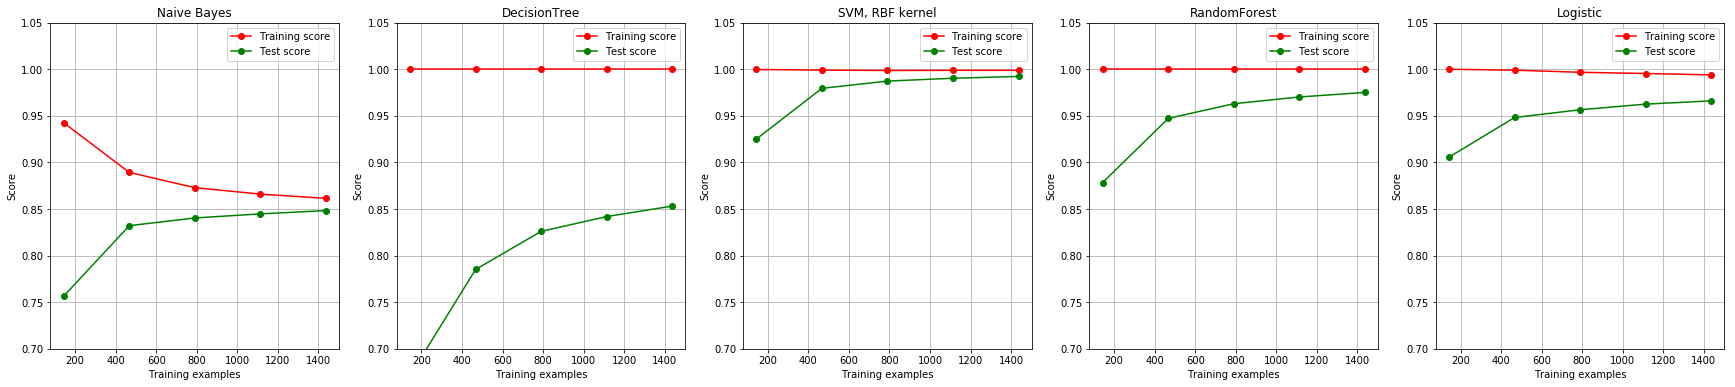

In [4]:
fig, axes = plt.subplots(1,5,figsize=(30,6))
for ind,title_,estimator in zip(range(len(title)),title,model):
    times = time()
    plot_learning_curve(estimator, title_, X, y,
                        ax=axes[ind], ylim = [0.7, 1.05],n_jobs=4, cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

In [1]:
# [*zip(range(len(title)),title,model)]

In [5]:
clf = GaussianNB()
cv = ShuffleSplit(n_splits=50  # 把数据分为多少份
                  , test_size=0.2  # 20%作为测试集
                  , random_state=0  # 分交叉验证的份数的时候进行的随机抽样的模式
                 )   # 规定好了交叉验证需要使用什么样的方法

In [6]:
train_sizes,train_scores,test_scores = learning_curve(clf  # 分类器，clf
                                                      ,X,y  # 特征矩阵和标签
                                                      ,cv=cv  # 表示交叉验证的模式
                                                      ,n_jobs=4  # 每次运行的时候可以并行使用的线程
                                                      # 每次运行的时候可以允许算法使用多少资源 
                                                     ) 
# 线程：算法在运行时，对计算机的计算资源的控制是多少

In [7]:
train_sizes  # 每次分训练集和测试集建模之后，训练集上的样本数量

array([ 143,  467,  790, 1113, 1437])

In [2]:
# train_scores # 训练集上的分数

In [9]:
train_scores.shape

(5, 50)

In [10]:
test_scores.shape

(5, 50)

得出结论：   
贝叶斯速度非常快，但是分类效果算是一般，基本上没有调参的余地了，只要样本量够大，第一次得出的结果就已经比较   
接近极限了。如果我们追求的是概率预测，首先应该用逻辑回归，但如果逻辑回归在稀疏矩阵等计算太过缓慢的话，我们   
会考虑贝叶斯。总而言之，在能够使用逻辑回归的情况下，我们更倾向于使用逻辑回归。当数据的维度太高，   
而我们又没有办法降维的话，那我们就是用贝叶斯。贝叶斯在高维数据上计算的非常快速。

如果我们的分类目标不是要追求概率，我们可以试试贝叶斯和决策树哪个效果好，因为这两个计算的快，如果在   
测试集上表现的效果已经很好了，那我们就没有必要换支持向量机或随机森林了，这样，运算速度又快，又好解释。   

但是无论如何，拿到数据我们要先想，我的目的是什么，是概率还是我只是想分类，然后要想，我的数据是怎样过的   
我的维度多不多，我希望它计算的快还是慢，我有什么样的其他的目标和追求，然后我们再来决定我们使用怎样的模型。

布里尔分数（Brier Score）: 衡量预测出的概率和真实结果的差异的一种方式。计算式为    
朴素贝叶斯预测出的概率和真实结果的均方误差

In [12]:
from sklearn.metrics import brier_score_loss

In [25]:
#注意，第一个参数是真实标签，第二个参数是预测出的概率值
#在二分类情况下，接口predict_proba会返回两列，但SVC的接口decision_function却只会返回一列
#要随时注意，使用了怎样的概率分类器，以辨别查找置信度的接口，以及这些接口的结构
brier_score_loss(Ytest, prob[:,1], pos_label=1)
#我们的pos_label与prob中的索引一致，就可以查看这个类别下的布里尔分数是多少

# 一定要明确多分类下哪一个类的概率，以及哪一个类的布里尔分数。它只能判断某一个类别，它的布里尔分数是多少。
# 不能整体判断整体的布里尔分数是多少。

0.032619662406118764

布里尔分数可以用于任何可以使用predict_proba接口调用概率的模型

In [26]:
from sklearn.metrics import brier_score_loss
brier_score_loss(Ytest,prob[:,8],pos_label=8)

0.0680707157691044

In [27]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR

In [29]:
np.unique(Ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto").fit(Xtrain,Ytrain)
svc = SVC(kernel = "linear",gamma=1).fit(Xtrain,Ytrain)

In [30]:
brier_score_loss(Ytest,logi.predict_proba(Xtest)[:,1],pos_label=1)

0.01144395640842291

In [31]:
#由于SVC的置信度并不是概率，为了可比性，我们需要将SVC的置信度“距离”归一化，压缩到[0,1]之间
svc_prob = (svc.decision_function(Xtest)-svc.decision_function(Xtest).min())/(svc.decision_function(Xtest).max() -svc.decision_function(Xtest).min())

In [32]:
brier_score_loss(Ytest,svc_prob[:,1],pos_label=1)               

0.23818950248917947

可以观察到，逻辑回归的布里尔分数有着压倒性优势,SVC的效果明显弱于贝叶斯和逻辑回归（如同我们之前在SVC
的讲解中说明过的一样，SVC是强行利用sigmoid函数来压缩概率，因此SVC产出的概率结果并不那么可靠）。贝叶
斯位于逻辑回归和SVC之间，效果也不错，但比起逻辑回归，还是不够精确和稳定。

支持向量机在预测概率时，明显是不如贝叶斯和逻辑回归的。

In [33]:
import pandas as pd
name = ["Bayes","Logistic","SVC"]
color = ["red","black","orange"]
df = pd.DataFrame(index=range(10),columns=name)

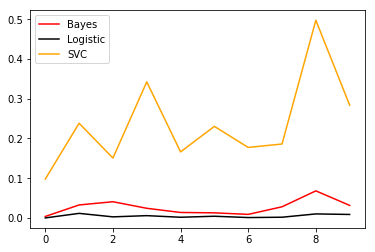

In [36]:
for i in range(10):
    df.loc[i,name[0]] = brier_score_loss(Ytest,prob[:,i],pos_label=i)
    df.loc[i,name[1]] = brier_score_loss(Ytest,logi.predict_proba(Xtest)[:,i],pos_label=i)
    df.loc[i,name[2]] = brier_score_loss(Ytest,svc_prob[:,i],pos_label=i)
for i in range(df.shape[1]):
    plt.plot(range(10),df.iloc[:,i],c=color[i])
plt.legend()
plt.show()

In [37]:
df

,Bayes,Logistic,SVC
0,0.00368051,9.02557e-06,0.0977746
1,0.0326197,0.011444,0.23819
2,0.040738,0.00267391,0.150612
3,0.0242275,0.00572442,0.342311
4,0.0137171,0.00169112,0.166205
5,0.0127707,0.00422794,0.230307
6,0.00890695,0.000914958,0.17735
7,0.0280067,0.00175736,0.18596
8,0.0680707,0.0100677,0.497354
9,0.0315248,0.00872097,0.283608


另一个衡量概率类评估指标：对数似然函数Log Loss(log_loss),被定义为：对于任何一个给定的概率分类器来说，   
我们求解预测概率为条件的情况下，真实概率发生的可能性的负对数。

In [39]:
from sklearn.metrics import log_loss

In [40]:
log_loss(Ytest,prob)

2.4725653911460683

In [41]:
log_loss(Ytest,logi.predict_proba(Xtest))

0.12756447917548608

In [42]:
log_loss(Ytest,svc_prob)

1.625556312147472

注意到，我们用log_loss得出的结论和我们使用布里尔分数得出的结论不一致：当使用布里尔分数作为评判标准的时
候，SVC的估计效果是最差的，逻辑回归和贝叶斯的结果相接近。而使用对数似然的时候，虽然依然是逻辑回归最强
大，但贝叶斯却没有SVC的效果好。为什么会有这样的不同呢？
因为逻辑回归和SVC都是以最优化为目的来求解模型，然后进行分类的算法。而朴素贝叶斯中，却没有最优化的过
程。对数似然函数直接指向模型最优化的方向，甚至就是逻辑回归的损失函数本身，因此在逻辑回归和SVC上表现得
更好。

在现实应用中，对数似然函数是概率类模型评估的黄金指标，往往是我们评估概率类模型的优先选择。要求概率的话，一般不会用贝叶斯   
，常常用逻辑回归或支持向量机求解类概率，很少使用我们的朴素贝叶斯。但是它也有一些缺点，首先它会偏向于有最优化算法的这些   
算法，它没有界，不像布里尔分数有上限，可以作为模型效果的参考。其次，它的解释性不如布里尔分数，很难与非技术人员去交流对   
数似然存在的可靠性和必要性。第三，它在以最优化为目标的模型上明显表现更好。

多分类，更倾向于对数似然函数，因为它可以一次性衡量我们多分类的结果。如果我们要看的是二分类，我们用   
布里尔分数。如果我要对比多个模型，用对数似然函数。单一模型就用布里尔分数，因为布里尔分数有界。   
概率能取到0或1时，用布里尔分数，不能取到0或1时用对数似然。

可靠性曲线：Reliability Curve   
又叫概率校准曲线，可靠性图。   
统计学中用来衡量概率预测的评估指标。以概率预测为横坐标，真实标签为纵坐标的曲线。   
该曲线越靠近 y = x 越好

和布尔分数相似，概率校准曲线是对于标签的某一类别来说的，因此一类标签就会有一条曲线。通常   
曲线用于二分类的情况较多。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification as mc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split

In [2]:
X, y = mc(n_samples=100000,n_features=20 #总共20个特征
            ,n_classes=2 #标签为2分类
            ,n_informative=2 #其中两个代表较多信息
            ,n_redundant=10 #10个都是冗余特征
            ,random_state=42) 

In [4]:
Xtrain.shape

(1000, 20)

In [5]:
Xtest.shape

(99000, 20)

In [6]:
np.unique(Ytrain)

array([0, 1])

In [7]:
y

array([0, 1, 0, ..., 1, 1, 0])

In [8]:
gnb = GaussianNB()
gnb.fit(Xtrain,Ytrain)
y_pred = gnb.predict(Xtest)
prob_pos = gnb.predict_proba(Xtest)[:,1] #我们的预测概率 - 横坐标
#Ytest - 我们的真实标签 - 横坐标

In [9]:
import pandas as pd
#在我们的横纵表坐标上，概率是由顺序的（由小到大），为了让图形规整一些，我们要先对预测概率和真实标签按照预测
# 概率进行一个排序，这一点我们通过DataFrame来实现
df = pd.DataFrame({"ytrue":Ytest[:500],"probability":prob_pos[:500]})

# 利用字典来创建DataFrame({"列的名称"：[列的值]})

In [10]:
df.head()

,ytrue,probability
0,1,9.999997e-01
1,0,9.999964e-01
2,1,1.000000e+00
3,1,9.886612e-01
4,0,8.441773e-18


In [11]:
df = df.sort_values(by="probability")

In [12]:
df.index = range(df.shape[0])

In [13]:
df.head()

,ytrue,probability
0,0,1.824809e-21
1,0,6.610435e-21
2,0,4.171566e-19
3,0,8.441773e-18
4,0,1.463199e-17


NameError: name 'clf_score' is not defined

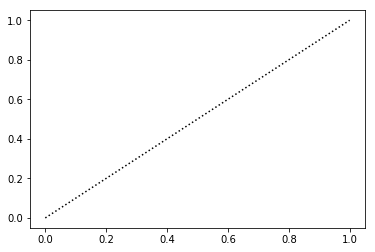

In [14]:
#紧接着我们就可以画图了
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated") #得做一条对角线来对比呀
ax1.plot(df["probability"],df["ytrue"],"s-"  # 每一个样本请用小方块，并且连起来
         ,label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

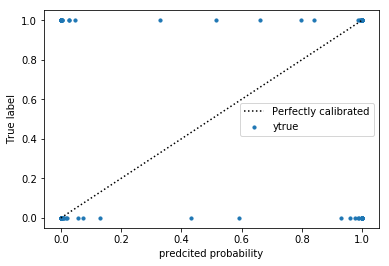

In [28]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.scatter(df["probability"],df["ytrue"],s=10)
ax1.set_ylabel("True label")
ax1.set_xlabel("predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

一个简单的做法是，将数据进行分箱，然后规定每个箱子中真实的少数类所占的
比例为这个箱上的真实概率trueproba，这个箱子中预测概率的均值为这个箱子的预测概率predproba，然后以
trueproba为纵坐标，predproba为横坐标，来绘制我们的可靠性曲线。

可见，分箱之后样本点的特征被聚合到了一起，曲线明显变得单调且平滑。这种分箱操作本质相当于是一种平滑，在
sklearn中，这样的做法可以通过绘制可靠性曲线的类calibration_curve来实现。和ROC曲线类似，类
calibration_curve可以帮助我们获取我们的横纵坐标，然后使用matplotlib来绘制图像。

y_true: 真实标签   
y_prob: 预测返回的，正类别下的概率值或置信度   
Normalize: 默认False，是否将y_prob 中输入的内容归一化到[0,1]之间   
n_bins: 分箱的个数   
属性：   
trueproba: 可靠性曲线的纵坐标，结构是（n_bins）,是每个箱子中少数类(Y=1）的占比   
predproba: 可靠性曲线的横坐标，结构是（n_bins）,是每个箱子中概率的均值

In [40]:
from sklearn.calibration import calibration_curve

In [48]:
#从类calibiration_curve中获取横坐标和纵坐标
trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10 #输入希望分箱的个数
                                         )

ValueError: Found input variables with inconsistent numbers of samples: [540, 99000]

NameError: name 'predproba' is not defined

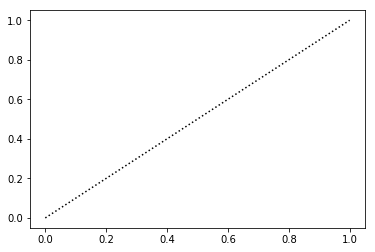

In [39]:
fig = plt.figure()
ax1 = plt.subplot()
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % ("Bayes", clf_score))
ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [540, 99000]

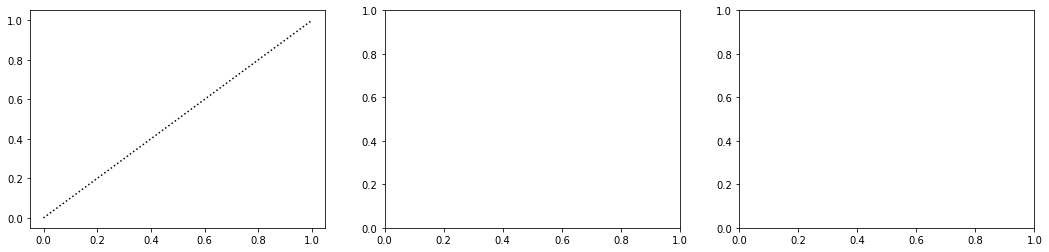

In [46]:
fig, axes = plt.subplots(1,3,figsize=(18,4))
for ind,i in enumerate([3,10,100]):
    ax = axes[ind]
    ax.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=i)
    ax.plot(predproba, trueproba,"s-",label="n_bins = {}".format(i))
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax.legend()
plt.show()

很明显可以看出，n_bins越大，箱子越多，概率校准曲线就越精确，但是太过精确的曲线不够平滑，无法和我们希望
的完美概率密度曲线相比较。n_bins越小，箱子越少，概率校准曲线就越粗糙，虽然靠近完美概率密度曲线，但是无
法真实地展现模型概率预测地结果。因此我们需要取一个既不是太大，也不是太小的箱子个数，让概率校准曲线既不
是太精确，也不是太粗糙，而是一条相对平滑，又可以反应出模型对概率预测的趋势的曲线。通常来说，建议先试试
看箱子数等于10的情况。箱子的数目越大，所需要的样本量也越多，否则曲线就会太过精确。

In [49]:
name = ["GaussianBayes","Logistic","SVC"]

gnb = GaussianNB()
logi = LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
svc = SVC(kernel = "linear",gamma=1)  # 不返回概率，返回置信度

In [52]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")

for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：对象和对象中的类，查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):  # 有概率则调概率，没概率则调置信度，并且进行归一化
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:  # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    #返回布里尔分数
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())  # 意思是说，把我的正样本列为1
    trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=10)
    ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))

ax1.set_ylabel("True probability for class 1")
ax1.set_xlabel("Mean predcited probability")
ax1.set_ylim([-0.05, 1.05])
ax1.legend()
ax1.set_title('Calibration plots (reliability curve)')
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-52-d4e8e4f357a6>, line 9)

对于贝叶斯，如果概率校准曲线呈现sigmoid函数的镜像的情况，则说明数据集中的特征不是相互条件独立的。

支持向量机在面对混合度较高的数据的时候，有着天生的置信度不足的缺点。

预测概率直方图：以样本的预测概率分箱后的结果为横坐标，分箱中的样本数量为纵坐标的图像。

In [59]:
fig,ax2 = plt.subplots(figsize=(8,6))
for clf, name_ in zip([gnb,logi,svc],name):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:,1]
    else:           # use decision function
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    ax2.hist(prob_pos
             ,bins=10
             ,label=name_
             ,histtype="step" #设置直方图为透明
             ,lw=2 #设置直方图每个柱子描边的粗细
           )
ax2.set_ylabel("Distribution of probability")
ax2.set_xlabel("Mean predicted probability")
ax2.set_xlim([-0.05, 1.05])
ax2.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax2.legend(loc=9)
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-59-fee17c1b3f16>, line 8)

支持向量机，大部分样本都在决策边界的附近，逻辑回归位于支持向量机和朴素贝叶斯之间，   
它属于一个比较健康的正样本的分布，朴素贝叶斯绝大部分样本都在决策边界附近，更倾向于决策边界。

概率密度曲线不等于概率分布直方图   
前者：横坐标是样本的取值，纵坐标是落在这个样本取值区间中的样本个数   

In [62]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)

    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

SyntaxError: invalid character in identifier (<ipython-input-62-0f42c7a35dea>, line 2)

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]

gnb = GaussianNB()

models = [gnb
         ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
        #定义两种校准方式
         ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
         ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

In [ ]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [ ]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest)

brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1)
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)

gnbisotonic.score(Xtest,Ytest)
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label = 1)

In [ ]:
name_svc = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
             ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
              #依然定义两种校准方式
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
plot_calib(models_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest)

for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

概率校准类：CalibratedClassifierCV,来对二分类情况下的数据集进行概率校正。   
base_estimator:输入有决策功能的分类器，必须存在predict_proba或decision_function接口。如果cv=prefit,分类器   
必须已经拟合数据完毕。   
CV：整数，确定交叉验证的策略，输入None，默认3折；还可以任意整数，指定折数。   


In [ ]:
def plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest,n_bins=10):
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import brier_score_loss
    from sklearn.calibration import calibration_curve
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name_ in zip(models,name):
        clf.fit(Xtrain,Ytrain)
        y_pred = clf.predict(Xtest)
        #hasattr(obj,name)：查看一个类obj中是否存在名字为name的接口，存在则返回True
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(Xtest)[:,1]
        else:  # use decision function
            prob_pos = clf.decision_function(Xtest)
            prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        #返回布里尔分数
        clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
        trueproba, predproba = calibration_curve(Ytest, prob_pos,n_bins=n_bins)
        ax1.plot(predproba, trueproba,"s-",label="%s (%1.3f)" % (name_, clf_score))
        ax2.hist(prob_pos, range=(0, 1), bins=n_bins, label=name_,histtype="step",lw=2)
    
    ax2.set_ylabel("Distribution of probability")
    ax2.set_xlabel("Mean predicted probability")
    ax2.set_xlim([-0.05, 1.05])
    ax2.legend(loc=9)
    ax2.set_title("Distribution of probablity")
    ax1.set_ylabel("True probability for class 1")
    ax1.set_xlabel("Mean predcited probability")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend()
    ax1.set_title('Calibration plots(reliability curve)')
    plt.show()

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
name = ["GaussianBayes","Logistic","Bayes+isotonic","Bayes+sigmoid"]

gnb = GaussianNB()
models = [gnb
        ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
        #定义两种校准方式
        ,CalibratedClassifierCV(gnb, cv=2, method='isotonic')
        ,CalibratedClassifierCV(gnb, cv=2, method='sigmoid')]

In [ ]:
plot_calib(models,name,Xtrain,Xtest,Ytrain,Ytest)

In [ ]:
gnb = GaussianNB().fit(Xtrain,Ytrain)
gnb.score(Xtest,Ytest)

In [ ]:
brier_score_loss(Ytest,gnb.predict_proba(Xtest)[:,1],pos_label = 1)
gnbisotonic = CalibratedClassifierCV(gnb, cv=2, method='isotonic').fit(Xtrain,Ytrain)

In [ ]:
gnbisotonic.score(Xtest,Ytest)

In [ ]:
brier_score_loss(Ytest,gnbisotonic.predict_proba(Xtest)[:,1],pos_label = 1)

可以看出，布里尔分数降低，准确率也降低了。

对SVM,DT来说，他们的概率不是真正意义上的概率，是一个置信度。   
对于贝叶斯来说，我们有很多假设，“朴素”假设，“概率分布”的假设，比如高斯，这种概率估计不是那么准确和严肃。   
通过校准，整体的准确率上升了，但是，这一系列有偏估计，在一组数据集上可能表现出上升，也可能表现出下降。

当两者相悖的时候，务必以准确率为准。   
对贝叶斯这样的分类器，没有参数可调，当我们的准确率不够的时候，要么换模型，要么校正准确率来试试。

所以，当你感觉，必须使用贝叶斯，但是贝叶斯的准确率不是太高的时候，请使用概率校准的这整个过程，来判断我的贝叶斯是否   
还有潜力。

接下来，试试SVM来说，哪一种校准是比较有效的。

In [ ]:
name_svc = ["SVC","Logistic","SVC+isotonic","SVC+sigmoid"]
svc = SVC(kernel = "linear",gamma=1)
models_svc = [svc
             ,LR(C=1., solver='lbfgs',max_iter=3000,multi_class="auto")
              #依然定义两种校准方式
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]
plot_calib(models_svc,name_svc,Xtrain,Xtest,Ytrain,Ytest)

可以看出，istonic和sigmoid的校准效果都非常不错，无论是从校准曲线还是从概率分布图来说，两种校准都让SVC接近逻辑回归。其中sigmoid   
更加有效。

In [ ]:
# 看看不同svc下精确度影响
name_svc = ["SVC","SVC+isotonic","SVC+sigmoid"]

svc = SVC(kernel = "linear",gamma=1)

models_svc = [svc
             ,CalibratedClassifierCV(svc, cv=2, method='isotonic')
             ,CalibratedClassifierCV(svc, cv=2, method='sigmoid')]

for clf, name in zip(models_svc,name_svc):
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(Xtest)[:, 1]
    else:
        prob_pos = clf.decision_function(Xtest)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Ytest, prob_pos, pos_label=y.max())
    score = clf.score(Xtest,Ytest)
    
    print("{}:".format(name))
    print("\tBrier:{:.4f}".format(clf_score))
    print("\tAccuracy:{:.4f}".format(score))

可见，svc在校准了之后都有所提升，概率校准对SVC非常有效。

到这里，概率类模型的评估指标和它的用法就结束了。

多项式朴素贝叶斯

擅长于分类型变量，用于处理离散型变量，而高斯朴素贝叶斯适合处理连续型变量。   
多项式朴素贝叶斯不接受负值的输入。故经常是稀疏矩阵。

在高斯朴素贝叶斯中，求解的概率时对一个样本来说，在多项式朴素贝叶斯中，求解的概率是对一个特征来说的。

MultinomialNB:   
alpha: 浮点数，可不填。默认1   
fit_prior: 表示说你是否让我学习先验概率呢，设置为False，则不使用先验，使用统一的先验概率。   
class_prior:形似数组的结构，如果没有给出具体的先验概率，则自动根据数组来进行计算。

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.metrics import brier_score_loss

In [18]:
class_1 = 500
class_2 = 500 #两个类别分别设定500个样本
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [0.5, 0.5] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False)

In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                ,test_size=0.3
                                                ,random_state=420)

In [21]:
#先归一化，保证输入多项式朴素贝叶斯的特征矩阵中不带有负数
mms = MinMaxScaler().fit(Xtrain)  # 训练集上来实例化和训练我们的模型
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [17]:
X.shape

(1000, 2)

In [19]:
np.unique(y)

array([0, 1])

In [22]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [23]:
#重要属性：调用根据数据获取的，每个标签类的对数先验概率log(P(Y))
#由于概率永远是在[0,1]之间，因此对数先验概率返回的永远是负值
mnb.class_log_prior_

array([-0.69029411, -0.69600841])

In [24]:
np.unique(Ytrain)

array([0, 1])

In [25]:
(Ytrain == 1).sum()/Ytrain.shape[0]

0.49857142857142855

In [26]:
mnb.class_log_prior_.shape   # 永远等于标签中所带的样本数量

(2,)

In [27]:
#可以使用np.exp来查看真正的概率值
np.exp(mnb.class_log_prior_)

array([0.50142857, 0.49857143])

In [28]:
#重要属性：返回一个固定标签类别下的每个特征的对数概率log(P(Xi|y))
mnb.feature_log_prob_

array([[-0.76164788, -0.62903951],
       [-0.72500918, -0.6622691 ]])

In [29]:
mnb.feature_log_prob_.shape

(2, 2)

In [30]:
#重要属性：在fit时每个标签类别下包含的样本数。当fit接口中的sample_weight被设置时，该接口返回的值也会受
# 到加权的影响
mnb.class_count_

array([351., 349.])

In [31]:
mnb.class_count_.shape

(2,)

In [32]:
#一些传统的接口
mnb.predict(Xtest_)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
mnb.predict_proba(Xtest_)  # 每个样本在每个标签取值下的概率

array([[0.49847128, 0.50152872],
       [0.50065987, 0.49934013],
       [0.50122363, 0.49877637],
       [0.50183745, 0.49816255],
       [0.50146433, 0.49853567],
       [0.50153147, 0.49846853],
       [0.50204549, 0.49795451],
       [0.50033124, 0.49966876],
       [0.50105254, 0.49894746],
       [0.50182815, 0.49817185],
       [0.50270707, 0.49729293],
       [0.50133396, 0.49866604],
       [0.49820896, 0.50179104],
       [0.50342829, 0.49657171],
       [0.50099022, 0.49900978],
       [0.49974388, 0.50025612],
       [0.50423879, 0.49576121],
       [0.50449207, 0.49550793],
       [0.49818224, 0.50181776],
       [0.50245485, 0.49754515],
       [0.50393627, 0.49606373],
       [0.50193571, 0.49806429],
       [0.49996152, 0.50003848],
       [0.50460038, 0.49539962],
       [0.50261175, 0.49738825],
       [0.50140163, 0.49859837],
       [0.50332522, 0.49667478],
       [0.50122253, 0.49877747],
       [0.50409939, 0.49590061],
       [0.49998717, 0.50001283],
       [0.

In [34]:
mnb.score(Xtest_,Ytest)

0.5433333333333333

In [35]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)

0.24977828412546027

In [36]:
#来试试看把Xtiain转换成分类型数据吧
#注意我们的Xtrain没有经过归一化，因为做哑变量之后自然所有的数据就不会又负数了
from sklearn.preprocessing import KBinsDiscretizer   # 对连续型变量进行分箱，变为分类型数据
kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)

In [37]:
Xtrain_ = kbs.transform(Xtrain)
Xtest_ = kbs.transform(Xtest)

In [38]:
Xtrain.shape  # 原来的两个特征中，每个特征分了10个箱所分出来的哑变量

(700, 2)

In [39]:
mnb = MultinomialNB().fit(Xtrain_, Ytrain)

In [40]:
mnb.score(Xtest_,Ytest)   # 惊喜！！！

可以看到，分类对于我们的朴素贝叶斯非常非常的关键。只要对我们的多项式贝叶斯进行了分类处理，其效果突飞猛进。

In [41]:
brier_score_loss(Ytest,mnb.predict_proba(Xtest_)[:,1],pos_label=1)  

0.0014593932778211862

伯努利朴素贝叶斯：处理二项分布

多元伯努利分布：可以存在多个特征，但每个特征都是二分类的

多项式朴素贝叶斯可以同时处理多项分布和二项分布，其中二项分布又叫做伯努利分布。   
伯努利朴素贝叶斯与多项式朴素贝叶斯非常相似，都常用于处理文本分类数据   
一个注重存在与否，一个注重出现了多少次   


BernoulliNB:   
参数：   
alpha:同上   
binarize: 将特征二值化的阈值，默认为0。   
fit_prior:是否学习先验概率。   
class_prior:同上

In [42]:
from sklearn.naive_bayes import BernoulliNB

In [43]:
#普通来说我们应该使用二值化的类sklearn.preprocessing.Binarizer来将特征一个个二值化
#然而这样效率过低，因此我们选择归一化之后直接设置一个阈值
mms = MinMaxScaler().fit(Xtrain)
Xtrain_ = mms.transform(Xtrain)
Xtest_ = mms.transform(Xtest)

In [44]:
#不设置二值化
bnl_ = BernoulliNB().fit(Xtrain_, Ytrain)
bnl_.score(Xtest_,Ytest)
brier_score_loss(Ytest,bnl_.predict_proba(Xtest_)[:,1],pos_label=1)

0.25000009482193225

In [47]:
#设置二值化阈值为0.5
bnl = BernoulliNB(binarize=0.5).fit(Xtrain_, Ytrain)
bnl.score(Xtest_,Ytest)

0.9833333333333333

In [46]:
brier_score_loss(Ytest,bnl.predict_proba(Xtest_)[:,1],pos_label=1)

0.010405875827339534

可见，伯努利贝叶斯也需要二值化，变为分类型变量。和多项式贝叶斯一样，伯努利贝叶斯   
的结果也受到数据结构非常大的影响。因此，根据数据的模样选择贝叶斯，是贝叶斯模型选   
择中十分重要的一点。

探索贝叶斯样本不平衡问题

In [2]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import brier_score_loss as BS,recall_score,roc_auc_score as AUC

In [3]:
class_1 = 50000 #多数类为50000个样本
class_2 = 500 #少数类为500个样本
centers = [[0.0, 0.0], [5.0, 5.0]] #设定两个类别的中心
clusters_std = [3, 1] #设定两个类别的方差
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False)

In [50]:
X.shape

(50500, 2)

In [51]:
np.unique(y)

array([0, 1])

In [52]:
name = ["Multinomial","Gaussian","Bernoulli"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB()]

for name,clf in zip(name,models):
    # 划分训练集和测试集，高斯对数据没有什么要求，而多项式要求特征必须是分类型，伯努利要求特征必须是二分类的，这两个都要做数据的预处理
    # 在预处理的时候改变了我的Xtrain和Xtest，所以在每次循环开始的时候重新对我们的数据进行一个分割，在执行时就不会再覆盖影响到
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
    if name != "Gaussian":  # 高斯不需要分类
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)
    # 拟合&结果
    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("/tAUC:{:.3f}".)

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771


以上三种贝叶斯方法不能处理样本不均衡问题，为此，改进多项式贝叶斯，补集朴素贝叶斯ComplementNB   
创造出数学方法，来逃避“朴素”假设，让算法不去关心特征之间是否有条件独立，为此，创造出了能够解决   
样本不平衡问题，并且能够解决朴素贝叶斯中“朴素”问题的补集朴素贝叶斯。（CNB）

ComplementNB：   
参数：   
alpha   
norm  :计算权重的时候，是否适用L2范式来规范权重的大小，默认不进行规范，若进行规范，请设置为True。    
fit_prior      
class_prior

In [4]:
from sklearn.naive_bayes import ComplementNB
from time import time
import datetime

name = ["Multinomial","Gaussian","Bernoulli","Complement"]
models = [MultinomialNB(),GaussianNB(),BernoulliNB(),ComplementNB()]

for name,clf in zip(name,models):
    times = time()
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y
                                                    ,test_size=0.3
                                                    ,random_state=420)
    #预处理
    if name != "Gaussian":  # 补集朴素贝叶斯是多项式改进，故也擅长处理分类问题
        kbs = KBinsDiscretizer(n_bins=10, encode='onehot').fit(Xtrain)
        Xtrain = kbs.transform(Xtrain)
        Xtest = kbs.transform(Xtest)

    clf.fit(Xtrain,Ytrain)
    y_pred = clf.predict(Xtest)
    proba = clf.predict_proba(Xtest)[:,1]
    score = clf.score(Xtest,Ytest)
    print(name)
    print("\tBrier:{:.3f}".format(BS(Ytest,proba,pos_label=1)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\tRecall:{:.3f}".format(recall_score(Ytest,y_pred)))
    print("\tAUC:{:.3f}".format(AUC(Ytest,proba)))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

Multinomial
	Brier:0.007
	Accuracy:0.990
	Recall:0.000
	AUC:0.991
00:00:581421
Gaussian
	Brier:0.006
	Accuracy:0.990
	Recall:0.438
	AUC:0.993
00:00:094946
Bernoulli
	Brier:0.009
	Accuracy:0.987
	Recall:0.771
	AUC:0.987
00:00:128924
Complement
	Brier:0.038
	Accuracy:0.953
	Recall:0.987
	AUC:0.991
00:00:076962


总结：   
补集朴素贝叶斯，运行速度非常快，捕捉出了少数类，并且在此基础上，维持了和原本多项式一致的AUC分数，在文本分类方面，效果优于多项式等。

案例： 文本分类

在sklearn中，单词计数向量计数可以通过feature.extraction.text模块中的CountVectorizer类来实现。

In [5]:
sample = ["Machine learning is fascinating, it is wonderful"
         ,"Machine learning is a sensational techonology"
         ,"Elsa is a popular character"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
vec = CountVectorizer()

In [9]:
X = vec.fit_transform(sample)

In [10]:
X

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [12]:
#使用接口get_feature_names()调用每个列的名称

vec.get_feature_names()   # 按照字母的顺序排列的单词

['character',
 'elsa',
 'fascinating',
 'is',
 'it',
 'learning',
 'machine',
 'popular',
 'sensational',
 'techonology',
 'wonderful']

In [14]:
import pandas as pd

In [15]:
#注意稀疏矩阵是无法输入pandas的
CVresult = pd.DataFrame(X.toarray(),columns = vec.get_feature_names())

In [16]:
CVresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0,0,1,2,1,1,1,0,0,0,1
1,0,0,0,1,0,1,1,0,1,1,0
2,1,1,0,1,0,0,0,1,0,0,0


根据补集朴素贝叶斯计算公式，将每一列加和除以整个特征矩阵的和，就是每一列对应的概率。   
但是对于句子特别长的样本而言，这个样本对theta的影响是巨大的，因此，补集朴素贝叶斯让每个特征的   
权重除以自己的L2范式。

TF-IDF方法：（term frequency-inverse document frequency)词频逆文档频率   
根据单词在文档中的频率来衡量其权重的。IDF的大小和一个词的常见程度成反比。   
sklearn中，使用feature_extraction.text中的类TfidfVectorizer来执行编码。


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF
vec = TFIDF()

In [18]:
X = vec.fit_transform(sample)

In [19]:
X  # 每个单词作为一个特征，每个单词在这个句子中所占的比例。

<3x11 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [20]:
#同样使用接口get_feature_names()调用每个列的名称
TFIDFresult = pd.DataFrame(X.toarray(),columns=vec.get_feature_names())

In [21]:
TFIDFresult

,character,elsa,fascinating,is,it,learning,machine,popular,sensational,techonology,wonderful
0,0.000000,0.000000,0.424396,0.501310,0.424396,0.322764,0.322764,0.000000,0.000000,0.000000,0.424396
1,0.000000,0.000000,0.000000,0.315444,0.000000,0.406192,0.406192,0.000000,0.534093,0.534093,0.000000
2,0.546454,0.546454,0.000000,0.322745,0.000000,0.000000,0.000000,0.546454,0.000000,0.000000,0.000000


In [22]:
#使用TF-IDF编码之后，出现得多的单词的权重被降低了么？ theta
# 每一列上的次数除以总共特征含有的特征的个数
CVresult.sum(axis=0)/CVresult.sum(axis=0).sum()

character      0.0625
elsa           0.0625
fascinating    0.0625
is             0.2500
it             0.0625
learning       0.1250
machine        0.1250
popular        0.0625
sensational    0.0625
techonology    0.0625
wonderful      0.0625
dtype: float64

In [23]:
TFIDFresult.sum(axis=0) / TFIDFresult.sum(axis=0).sum()

# 将原本出现次数比较多的词进行压缩，以实现压缩我们的权重
# 将原本出现次数比较少的词增加我们的权重
# 这样可以抑制没意义的词

character      0.083071
elsa           0.083071
fascinating    0.064516
is             0.173225
it             0.064516
learning       0.110815
machine        0.110815
popular        0.083071
sensational    0.081192
techonology    0.081192
wonderful      0.064516
dtype: float64

In [24]:
from sklearn.datasets import fetch_20newsgroups

In [25]:
#初次使用这个数据集的时候，会在实例化的时候开始下载
data = fetch_20newsgroups()

In [ ]:
#通常我们使用data来查看data里面到底包含了什么内容，但由于fetch_20newsgourps这个类加载出的数据巨大，数
# 据结构中混杂很多文字，因此很难去看清

In [26]:
#不同类型的新闻
# 标签的分类都有哪些
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
#其实fetch_20newsgroups也是一个类，既然是类，应该就有可以调用的参数
#面对简单数据集，我们往往在实例化的过程中什么都不写，但是现在data中数据量太多，不方便探索
#因此我们需要来看看我们的类fetch_20newsgroups都有什么样的参数可以帮助我们

fetch_20newsgroups参数列表：   
subset:选择类中包含的数据子集，train,test,all   
categores: 选择一个子集下，不同类型或不同内容的数据所在的目录。   
download_if_missing:如果发现本地数据不全，是否自动下载   
shuffle: 表示是否打乱样本的顺序，对于样本之间相互独立，并且服从相同分布的算法或模型（比如SGD）来说很重要

In [27]:
import numpy as np
import pandas as pd

In [28]:
categories = ["sci.space" #科学技术 - 太空
             ,"rec.sport.hockey" #运动 - 曲棍球
             ,"talk.politics.guns" #政治 - 枪支问题
             ,"talk.politics.mideast"] #政治 - 中东问题

In [29]:
train = fetch_20newsgroups(subset="train",categories = categories)
test = fetch_20newsgroups(subset="test",categories = categories)

In [1]:
# train
#可以观察到，里面依然是类字典结构，我们可以通过使用键的方式来提取内容

In [31]:
train.target_names

['rec.sport.hockey',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast']

In [32]:
#查看总共有多少篇文章存在
len(train.data)

2303

In [38]:
#随意提取一篇文章来看看
print(train.data[0])

From: tvartiai@vipunen.hut.fi (Tommi Vartiainen)
Subject: Re: Finland/Sweden vs.NHL teams (WAS:Helsinki/Stockholm & NHL expansion)
Nntp-Posting-Host: vipunen.hut.fi
Organization: Helsinki University of Technology, Finland
Lines: 51

In <1993Apr16.195754.5476@ousrvr.oulu.fi> mep@phoenix.oulu.fi (Marko Poutiainen) writes:

>: FINLAND:  
>: 
>: D-Jyrki Lumme.......20
>: D-Teppo Numminen....20
>: D-Peter Ahola.......13
>: 
>Well well, they don't like our defenders (mainly Lumme and Numminen)...

About 25 is correct for Numminen and Lumme.


>: R-Teemu Selanne.....27
>: 
>Compared to Kurri, Selanne's points are too high, lets make it 25 or 26.

No, Kurri's points are too low. 27 for Kurri and 28 for Sel{nne.

>: well in the Canada Cup and World Championships largely due to the efforts of
>: Markus Ketterer (the goalie), 3-4 or the players listed above and luck. There's
>: presumably a lot of decent players in Finland that wouldn't be superstars at
>: the highest level but still valuable rol

In [34]:
#查看一下我们的标签
np.unique(train.target)

array([0, 1, 2, 3], dtype=int64)

In [35]:
len(train.target)

2303

In [36]:
#是否存在样本不平衡问题？
for i in [1,2,3]:
    print(i,(train.target == i).sum()/len(train.target))

1 0.25749023013460703
2 0.23708206686930092
3 0.24489795918367346


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

In [40]:
Xtrain = train.data
Xtest = test.data
Ytrain = train.target
Ytest = test.target

In [41]:
tfidf = TFIDF().fit(Xtrain)

Xtrain_ = tfidf.transform(Xtrain)
Xtest_ = tfidf.transform(Xtest)

In [42]:
Xtrain_

<2303x40725 sparse matrix of type '<class 'numpy.float64'>'
	with 430306 stored elements in Compressed Sparse Row format>

In [43]:
tosee = pd.DataFrame(Xtrain_.toarray(),columns=tfidf.get_feature_names())

In [44]:
tosee.head()

,00,000,0000,00000,000000,000021,000062david42,000152,000246,000256,...,zwrm,zx,zx6wre,zxp,zxqi,zy,zyg,zz,zz_g9q3,zzzzzz
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.058046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
tosee.shape

(2303, 40725)

In [50]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import brier_score_loss as BS

name = ["Multinomial","Complement","Bournulli"]
#注意高斯朴素贝叶斯不接受稀疏矩阵
models = [MultinomialNB(),ComplementNB(),BernoulliNB()]

In [2]:
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)

    #4个不同的标签取值下的布里尔分数
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest,proba[:,i],pos_label=i)
        Bscore.append(bs)
        print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))

    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

NameError: name 'name' is not defined

In [52]:
from sklearn.calibration import CalibratedClassifierCV   # 概率校准

In [ ]:
name = ["Multinomial"
        ,"Multinomial + Isotonic"
        ,"Multinomial + Sigmoid"
        ,"Complement"
        ,"Complement + Isotonic"
        ,"Complement + Sigmoid"
        ,"Bernoulli"
        ,"Bernoulli + Isotonic"
        ,"Bernoulli + Sigmoid"]
models = [MultinomialNB()
            ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='isotonic')
            ,CalibratedClassifierCV(MultinomialNB(), cv=2, method='sigmoid')
            ,ComplementNB()
            ,CalibratedClassifierCV(ComplementNB(), cv=2, method='isotonic')
            ,CalibratedClassifierCV(ComplementNB(), cv=2, method='sigmoid')
            ,BernoulliNB()
            ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='isotonic')
            ,CalibratedClassifierCV(BernoulliNB(), cv=2, method='sigmoid')
            ]
for name,clf in zip(name,models):
    clf.fit(Xtrain_,Ytrain)
    y_pred = clf.predict(Xtest_)
    proba = clf.predict_proba(Xtest_)
    score = clf.score(Xtest_,Ytest)
    print(name)
    Bscore = []
    for i in range(len(np.unique(Ytrain))):
        bs = BS(Ytest,proba[:,i],pos_label=i)
        Bscore.append(bs)
    print("\tBrier under {}:{:.3f}".format(train.target_names[i],bs))
    print("\tAverage Brier:{:.3f}".format(np.mean(Bscore)))
    print("\tAccuracy:{:.3f}".format(score))
    print("\n")

可见，多项式分布下无论如何调整，算法的效果都不如补集朴素贝叶斯来的好，因此我们再分类的时候应该选择补集   
朴素贝叶斯。对补集来说，sigmoid进行概率校准的模型综最优秀，准确率最高，非常理想。   
对于机器学习而言，朴素贝叶斯不是也许不是最常用的算法，但作为概率预测算法中唯一一个真正依赖概率来进行计算   
并且简单快捷的算法，还是很重要的。其在文本分类上的效果的确很好。由此可见，只要能够有足够的数据，NB就有意想不到   
的效果。